<a href="https://colab.research.google.com/github/vinitisready/Machine-Learning/blob/main/Hands_On_Predictive_Analysis_in_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataFrame = pd.read_csv('/content/diabetes.csv')
dataFrame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataFrame.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
dataFrame.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [6]:
dataFrame.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


--> Data Imputation of 0's in every feature.
--> Size of the data.

In [7]:
dataFrame.shape

(768, 9)

# Here, our target column is "Outcome"[0,1] --> Binary classification task.

As we have the target column so it is a supervised learning model.


In [8]:
dataFrame.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Drawing a heatmap

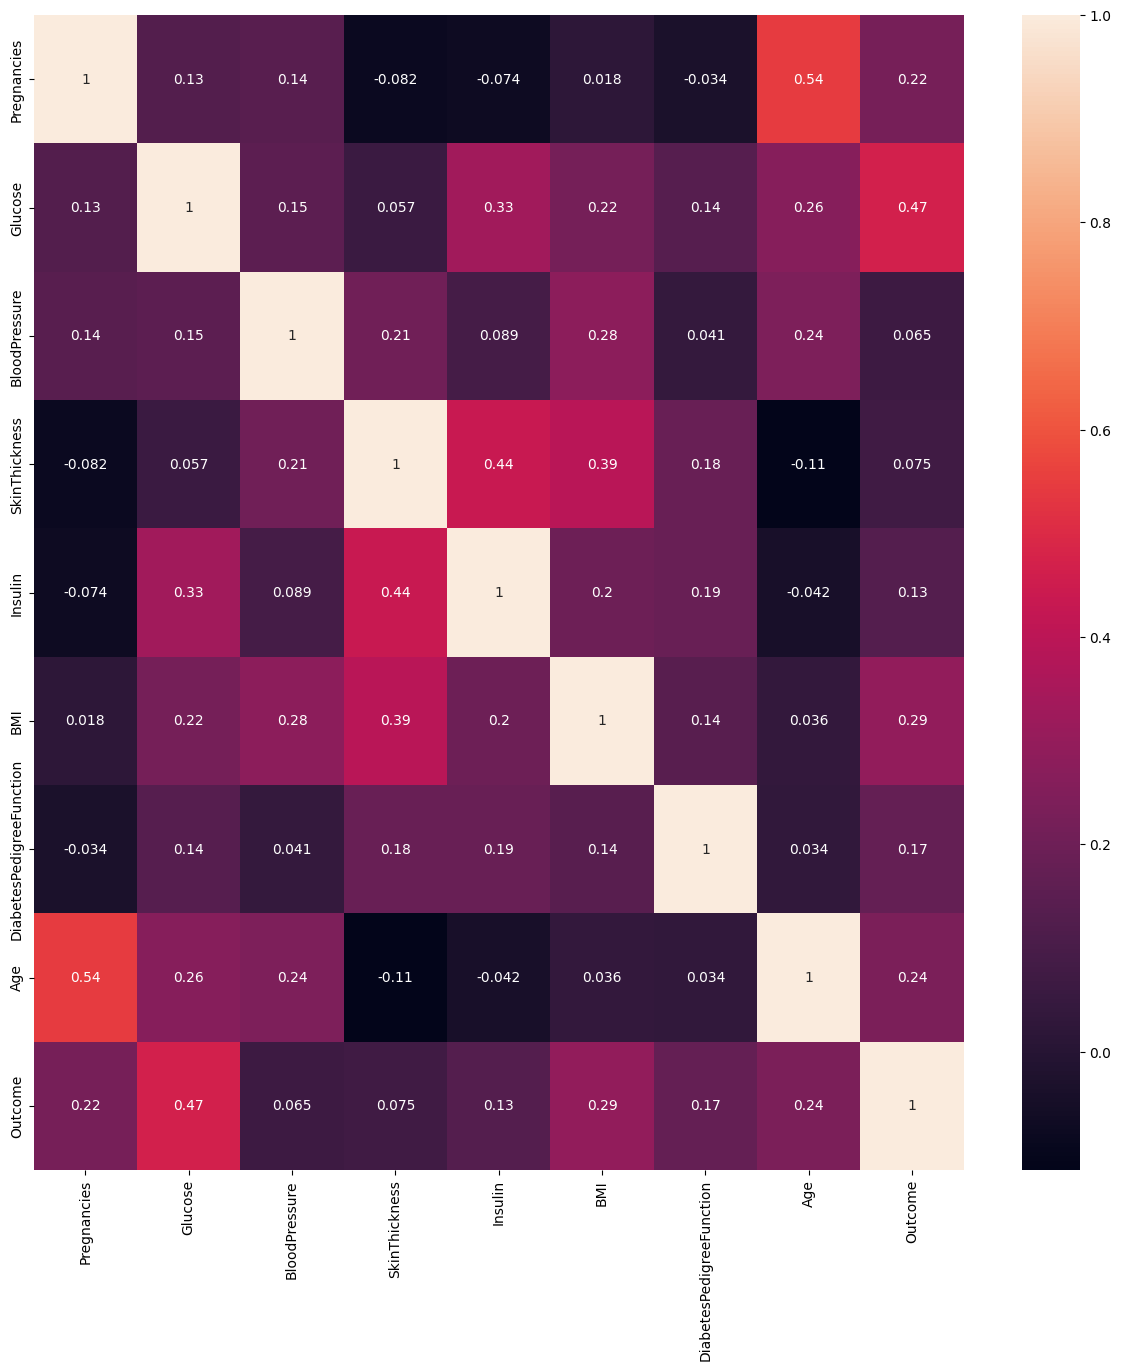

In [9]:
plt.figure(figsize = (15,15))
ax = sns.heatmap(dataFrame.corr(), annot = True)
plt.savefig('correlation-coefficient.jpg')
plt.show( )

Here this heatmap indicates that not too many features here are highly correlated so we have to take each and every feature into consideration.

Descriptive Statistics of the given data

In [10]:
dataFrame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Imputation


> For Numeric Data


# The best and robust data imputation element is median as it avoids the major shifts done by the outliers

<ipython-input-11-0e6bce782d34>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataFrame.Pregnancies)


<Axes: xlabel='Pregnancies', ylabel='Density'>

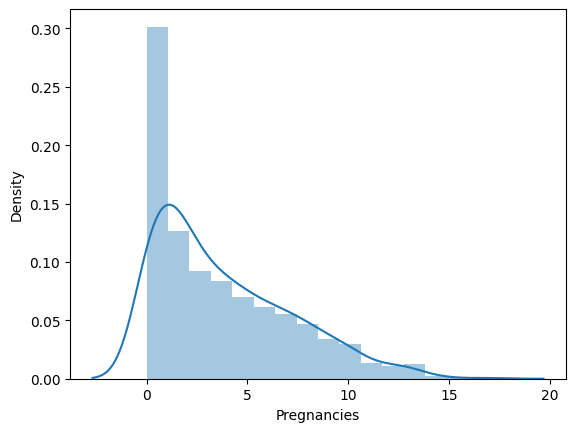

In [11]:
sns.distplot(dataFrame.Pregnancies)

<ipython-input-12-0db95d727bfa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataFrame.BloodPressure)


<Axes: xlabel='BloodPressure', ylabel='Density'>

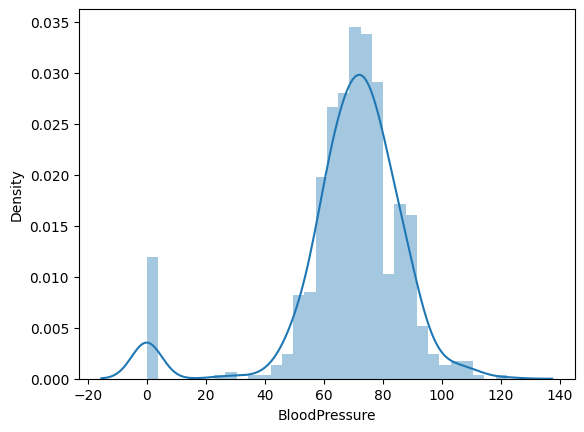

In [12]:
sns.distplot(dataFrame.BloodPressure)

<ipython-input-13-7ad5e012767e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataFrame.Insulin)


<Axes: xlabel='Insulin', ylabel='Density'>

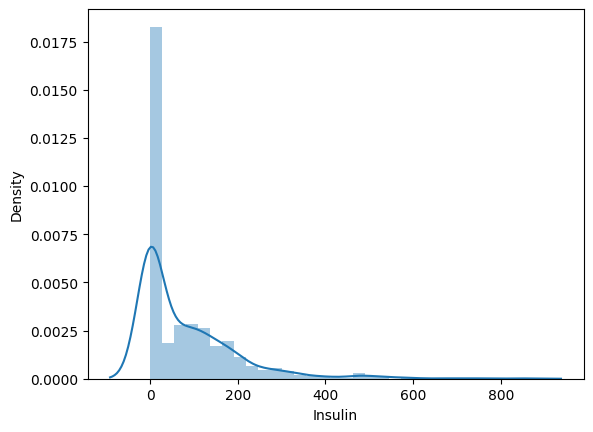

In [13]:
sns.distplot(dataFrame.Insulin)

This is a rightly skewed data so we have to impute the zeroes of this column and replace it with median

In [14]:
dataFrame['Insulin'] = dataFrame['Insulin'].replace(0, dataFrame['Insulin'].median())

In [15]:
dataFrame.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,0,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,0,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,0,0,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,0,30.5,0.0,0.232,54,1


Similarly we have to replace all the occuring zeros in the columns with their respecti  medians

If the column's plot is approaching to a normal distribution then we need to replace the zeroes with mean and if the plot is a a skewed one then we have to replace it with median

In [16]:
dataFrame['Pregnancies'] = dataFrame['Pregnancies'].replace(0, dataFrame['Pregnancies'].median())
dataFrame['Glucose'] = dataFrame['Glucose'].replace(0, dataFrame['Glucose'].median())
dataFrame['InsulBloodPressurein'] = dataFrame['BloodPressure'].replace(0, dataFrame['BloodPressure'].median())
dataFrame['SkinThickness'] = dataFrame['SkinThickness'].replace(0, dataFrame['SkinThickness'].median())
dataFrame['BMI'] = dataFrame['BMI'].replace(0, dataFrame['BMI'].median())
dataFrame['DiabetesPedigreeFunction'] = dataFrame['DiabetesPedigreeFunction'].replace(0, dataFrame['DiabetesPedigreeFunction'].median())
dataFrame['Age'] = dataFrame['Age'].replace(0, dataFrame['Age'].median())
dataFrame['Outcome'] = dataFrame['Outcome'].replace(0, dataFrame['Outcome'].median())

Splitting our data


*   X --> Input Feature
*   Y --> Target Value



In [17]:
 X = dataFrame.drop(columns='Outcome',axis =1)
 Y = dataFrame['Outcome']

Outlier Detection --> Box Plot

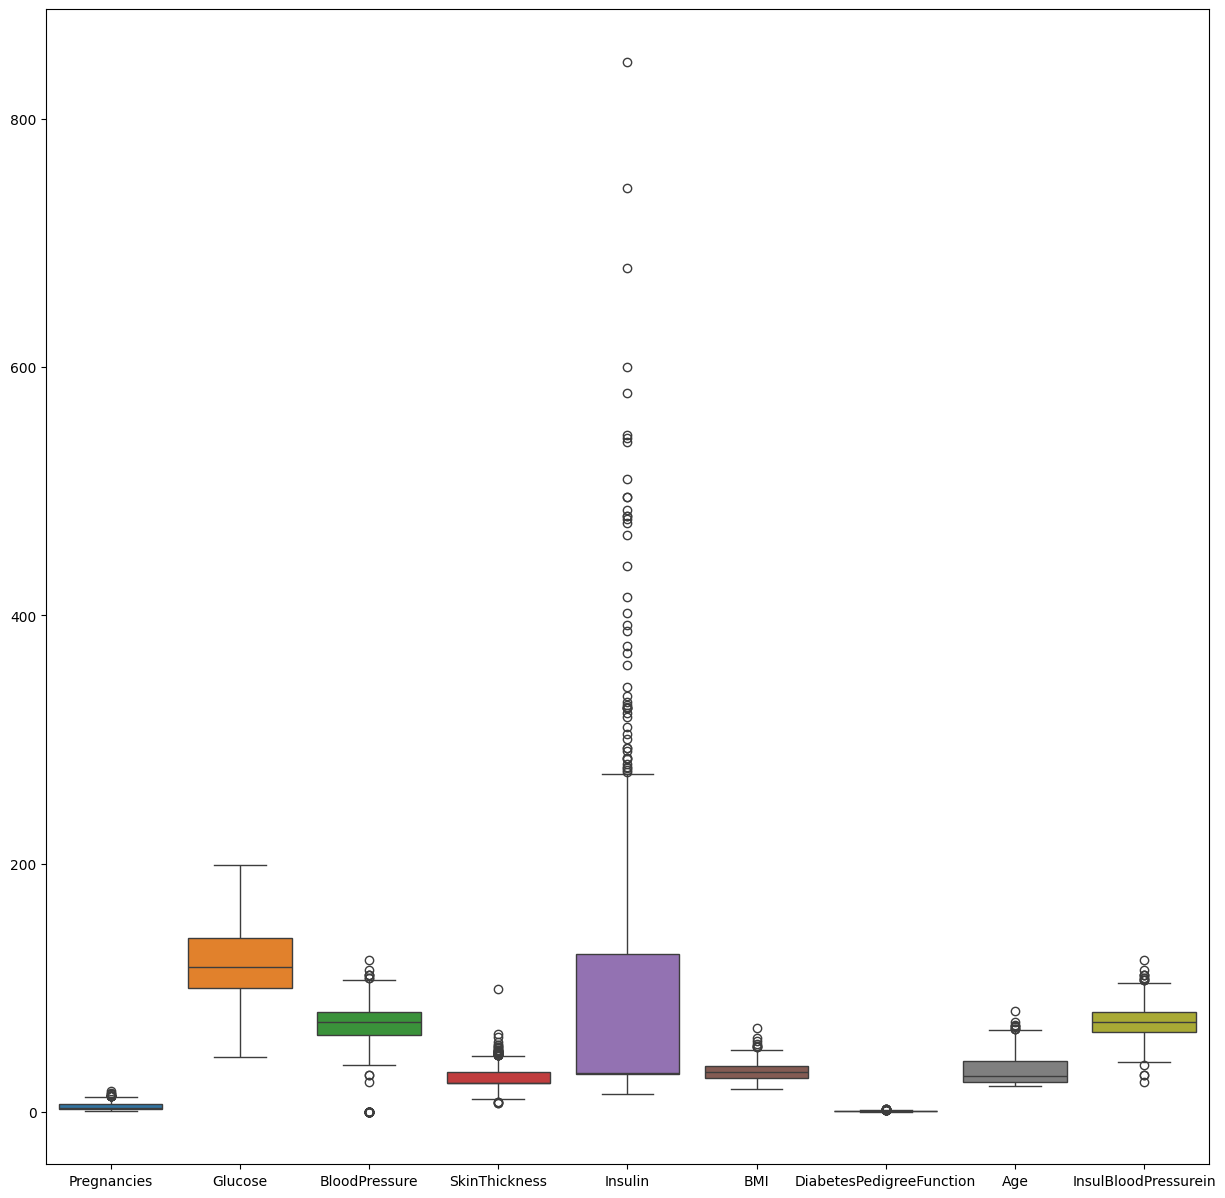

In [18]:
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = X, ax=ax)
plt.savefig('boxplot.jpg')
plt.show()

Here we are dealing with the outliers with the help of Inter Quartile Range (IQR).

In [19]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
  Q1 = X[col].quantile(0.25)
  Q3 = X[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  mask = (X[col] >= lower_bound) & (X[col] <= upper_bound)


In [20]:
X_outliers_removed = X[mask]
Y_outliers_removed = Y[mask]

In [21]:
X_outliers_removed.shape

(759, 9)

In [22]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X_outliers_removed)

Here We are changing our data in standard form so as to no biasing must be there for any specific data features.**Normalization using standardization **

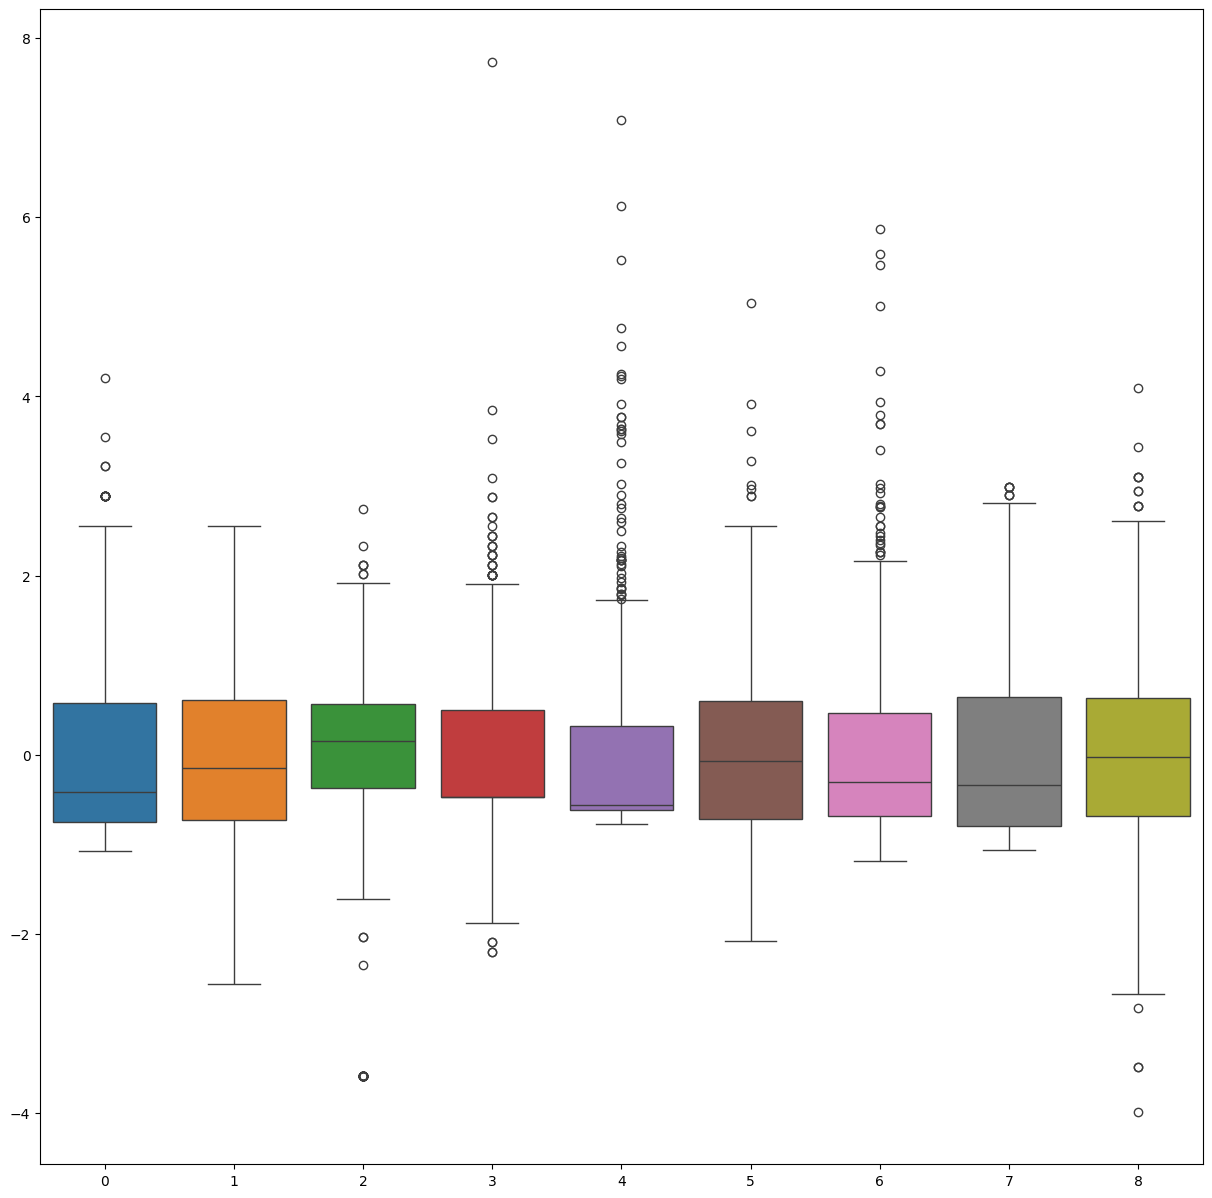

In [23]:
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = X_scaled, ax=ax)
plt.savefig('Standardisedboxplot.jpg')
plt.show()

In the above diagram we can observe that all the datapoints are in the same range. Still there are outliers present here, we will deal with them further

In [24]:
Y_outliers_removed.value_counts()

,count
Outcome,
0,493
1,266


Handling the imbalanced data

In [25]:
dataFrame.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'InsulBloodPressurein'],
      dtype='object')

In [26]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [27]:
X_scaled = pd.DataFrame(X_scaled, columns = cols)
X_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,2.176564e-16,1.334023e-16,-1.509552e-16,-4.329724e-17,-2.410603e-16,4.914821e-17,1.591466e-16,-2.691450e-17
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.557008e+00,-3.587616e+00,-2.200901e+00,-7.684941e-01,-2.081055e+00,-1.183313e+00,-1.062953e+00,-3.985285e+00
25%,-7.491956e-01,-7.277108e-01,-3.691233e-01,-4.729631e-01,-6.126688e-01,-7.125969e-01,-6.852739e-01,-7.928253e-01,-6.872979e-01
50%,-4.185912e-01,-1.509053e-01,1.499884e-01,-4.729631e-01,-5.607270e-01,-7.204226e-02,-3.045975e-01,-3.426125e-01,-2.770048e-02
75%,5.732217e-01,6.071820e-01,5.652778e-01,4.990017e-01,3.222827e-01,5.976285e-01,4.627740e-01,6.478556e-01,6.318969e-01
max,4.209869e+00,2.551840e+00,2.745547e+00,7.734740e+00,7.088876e+00,5.037837e+00,5.864467e+00,2.988962e+00,4.094783e+00


Model Training

In [28]:
X_scaled.reset_index(drop=True, inplace=True)
Y_outliers_removed.reset_index(drop=True, inplace=True)

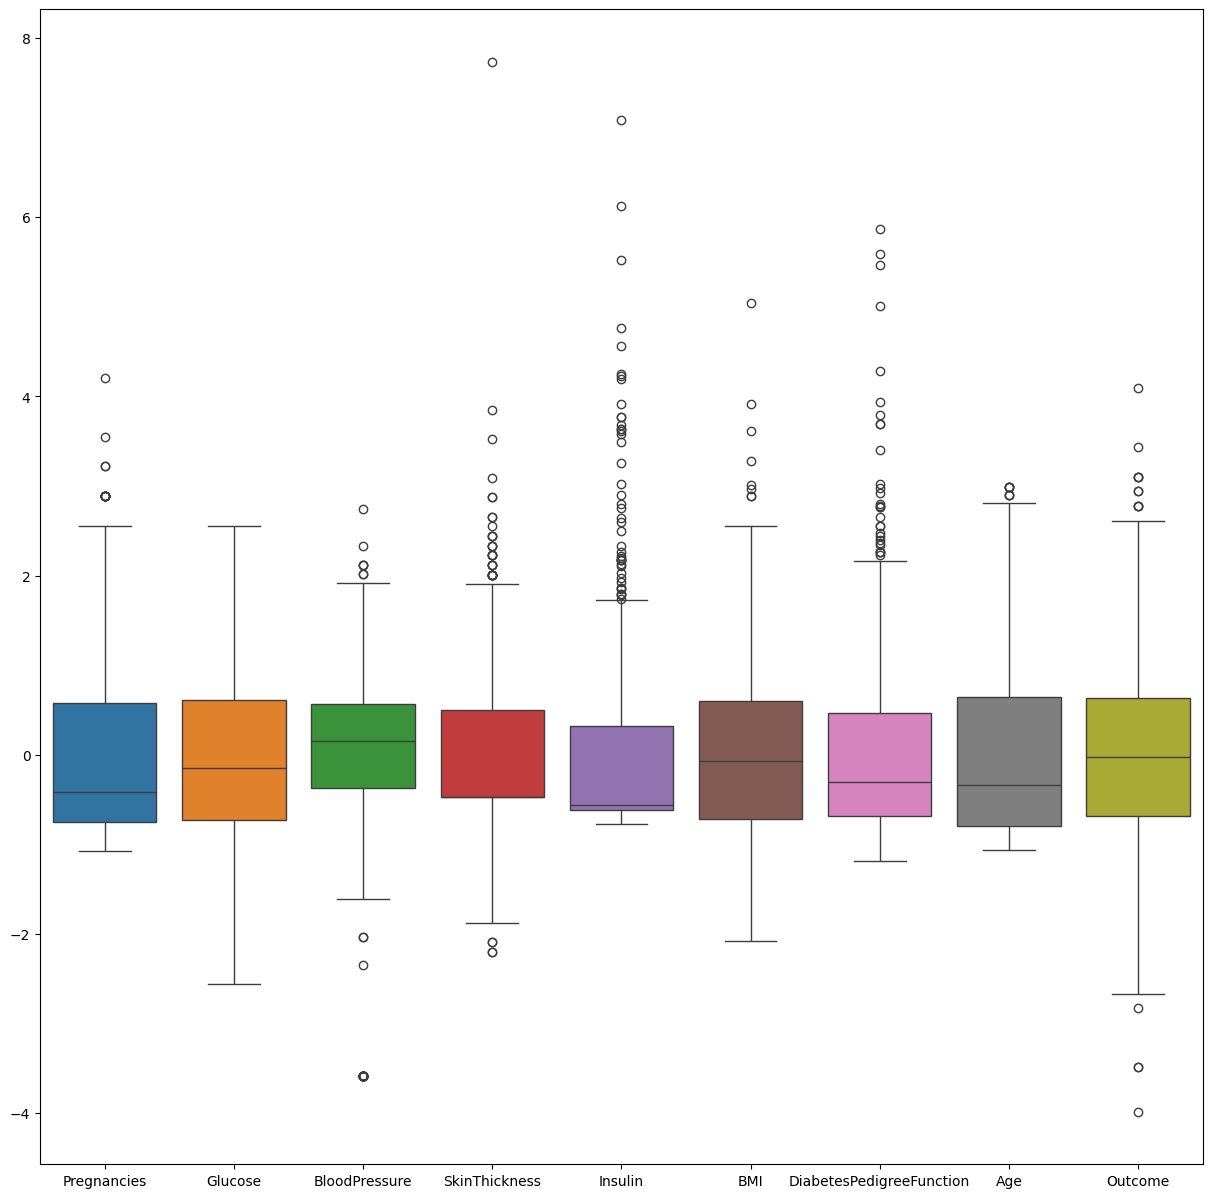

In [29]:
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = X_scaled, ax=ax)
plt.savefig('Standardisedboxplot.jpg')
plt.show()

Outlier Detection using quantiles

In [30]:
dataFrame.shape

(768, 10)

In [31]:
X_scaled.shape


(759, 9)

In [32]:
q = X_scaled['Insulin'].quantile(0.95)
mask = X_scaled['Insulin'] < q
dataNew = X_scaled[mask]
Y_outliers_removed = Y_outliers_removed[mask]


In [33]:
dataNew.shape

(721, 9)

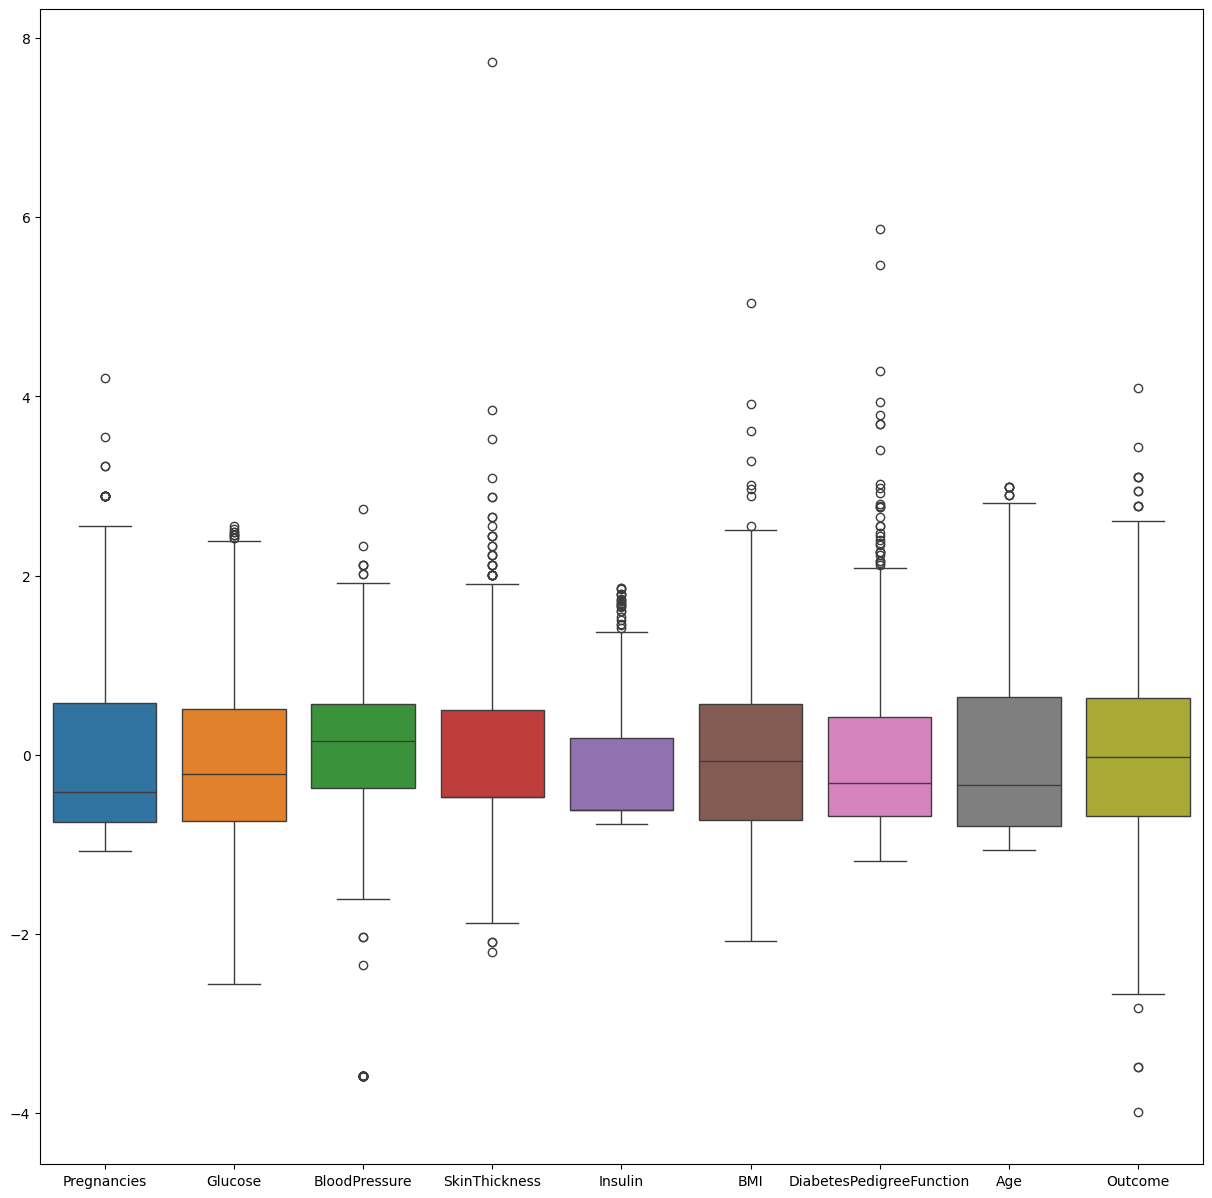

In [34]:
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = dataNew, ax=ax)
plt.savefig('Standardisedboxplot.jpg')
plt.show()

In [35]:
Y_outliers_removed.shape

(721,)

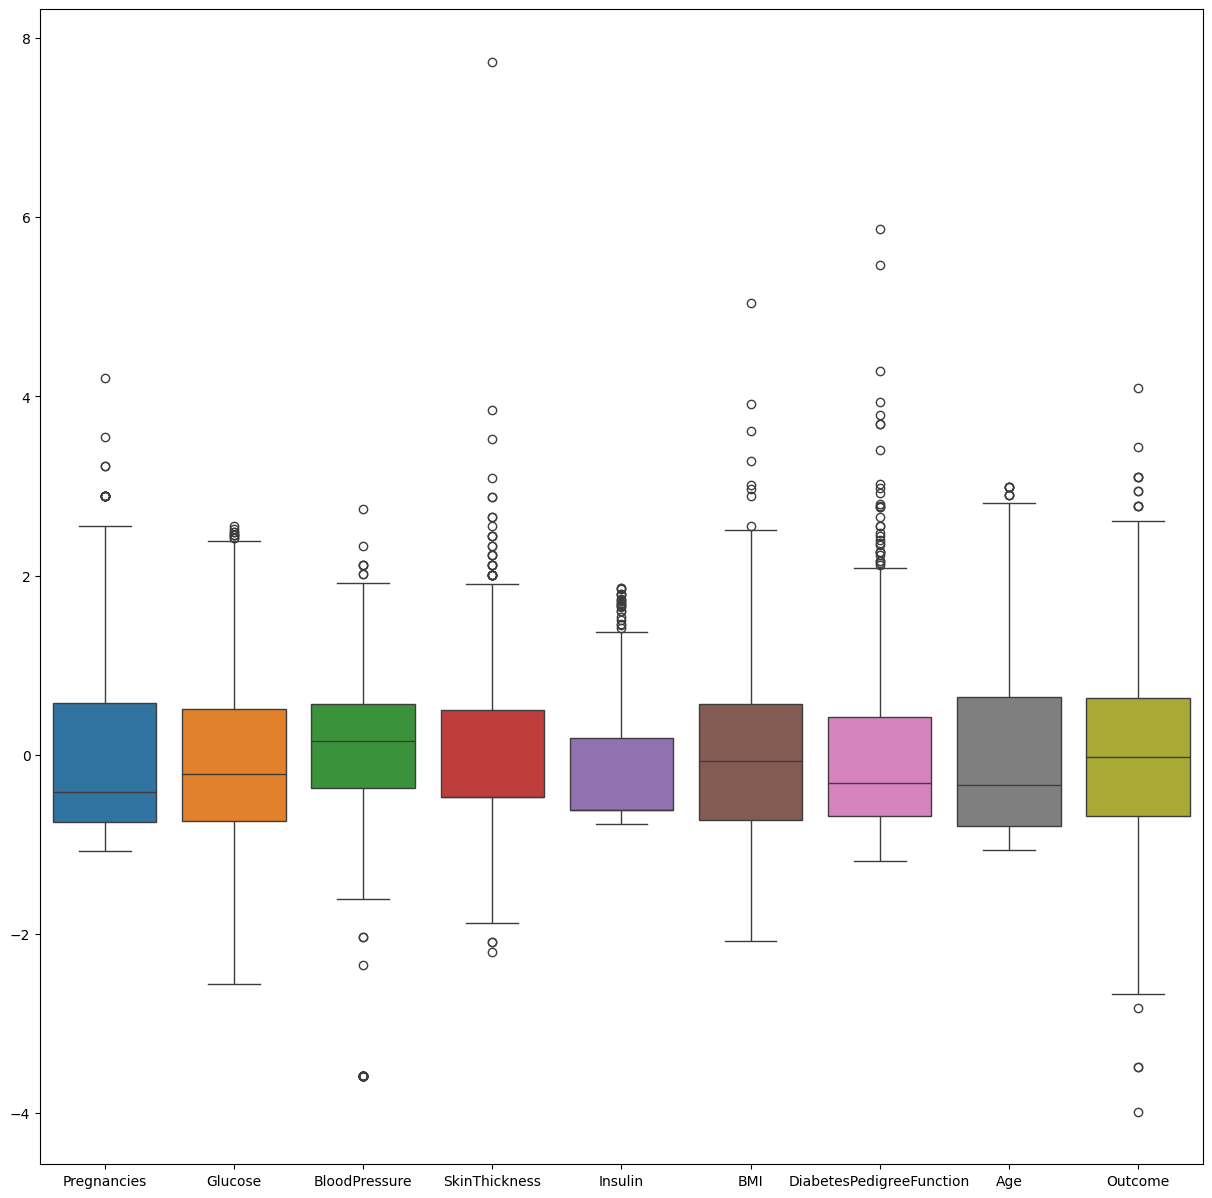

In [36]:
fig, ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = dataNew, ax=ax)
plt.savefig('Standardisedboxplot.jpg')
plt.show()

**Model Training**

**Splitting of data into **training** and testing**

In [39]:
from sklearn.model_selection import train_test_split

y = Y_outliers_removed
X_train, X_test, y_train, y_test = train_test_split(dataNew,Y_outliers_removed, test_size=0.33, random_state=42)


In [40]:
X_train.shape

(483, 9)

In [41]:
X_test.shape

(238, 9)

Data Imbalance
**Techniques**


*   Oversampling : Minority class and increase that number to the majority class
*   Undersampling : Majority class and decrease the number to the minority class
*   SMOTE : Synthetic data and increase the number of samples to the majority class





In [42]:
y_train.value_counts()

,count
Outcome,
0,318
1,165


SMOTE Technique

In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Check resampled class distribution
print("\nResampled Class Distribution:")
print(pd.Series(y_train_resampled.value_counts()))
#


Resampled Class Distribution:
Outcome
0    318
1    318
Name: count, dtype: int64


Model Training : Implementation of logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()
classification.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

Model Prediction

In [45]:
Y_prediction = classification.predict(X_test)
print(Y_prediction)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1]


Finding the accuracy

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y_prediction)

0.7563025210084033

In [47]:
from sklearn.metrics import classification_report
target_names = ['Non-Diabetic','Diabetic']
print(classification_report(y_test, Y_prediction, target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetic       0.85      0.77      0.81       159
    Diabetic       0.61      0.73      0.67        79

    accuracy                           0.76       238
   macro avg       0.73      0.75      0.74       238
weighted avg       0.77      0.76      0.76       238



In [49]:
import pickle
pickle.dump(classification, open('ClassificationModel.pkl', 'wb') )

In [51]:
classificationModel = pickle.load(open("ClassificationModel.pkl", "rb"))
classificationModel.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1])